# DSI 33_Project 2 - Modelling - Florian Combelles
## Ames Housing Data and Kaggle Challenge

## Project Summary

Welcome to Project 2! It's time to start modeling.

**Primary Learning Objectives:**
1. Creating and iteratively refining a regression model
2. Using [Kaggle](https://www.kaggle.com/) to practice the modeling process
3. Providing business insights through reporting and presentation.

You are tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses.

Secondly, we are hosting a competition on Kaggle to give you the opportunity to practice the following skills:

- Refining models over time
- Use of train-test split, cross-validation, and data with unknown values for the target to simulate the modeling process
- The use of Kaggle as a place to practice data science

As always, you will be submitting a technical report and a presentation. **You may find that the best model for Kaggle is not the best model to address your data science problem.**

## Set-up

Before you begin working on this project, please do the following:

1. Sign up for an account on [Kaggle](https://www.kaggle.com/)
2. Review the material and download data files on the [DSI-US-11 Regression Challenge](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge)
4. Review the [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

## The Modeling Process

1. The train dataset has all of the columns that you will need to generate and refine your models. The test dataset has all of those columns except for the target that you are trying to predict in your Regression model.
2. Generate your regression model using the training data. We expect that within this process, you'll be making use of:
    - train-test split
    - cross-validation / grid searching for hyperparameters
    - strong exploratory data analysis to question correlation and relationship across predictive variables
    - code that reproducibly and consistently applies feature transformation (such as the preprocessing library)
3. Predict the values for your target column in the test dataset and consider submitting your predictions to Kaggle to see how your model does against unknown data.
    - **Note**: Kaggle expects to see your submissions in a specific format. Check the challenge's page to make sure you are formatting your CSVs correctly!
    - **You are limited to models you've learned in class so far**. In other words, you cannot use XGBoost, Neural Networks or any other advanced model for this project.
4. Evaluate your models!
    - consider your evaluation metrics
    - consider your baseline score
    - how can your model be used for inference?
    - why do you believe your model will generalize to new data?

### Problem Statement:

We are part of the data team of a real estate agency based in Ames area. The objective of our company is to provide the most accurate sale price to clients who are looking to sell their houses. We also provide counseling on how to optimise sale price based on different features.


The housing and real estate market is getting more competitive and we're loosing the edge we once had to our competitor. Our current machine learning model is not accurate enough to keep up with the competition.
We need to find a better model to regain the advantage.

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor

# Remove warning messages from the code
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Changing Pandas settings to display more rows and columns

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 60)

##### Importing the cleaned train Ames housing dataset

In [3]:
house_train_clean = pd.read_csv('datasets/train_cleaned.csv')

house_train = pd.read_csv('datasets/train.csv')

In [4]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Dumify Data to prepare it for the model

We need to dumify the categorical data that we have selected during our EDA in order for the machine learning model to be able to use them.

In [5]:
# Dummify categorical columns in clean dataset

house_train_clean = pd.get_dummies(columns=['House Style','Exterior 1st','Mas Vnr Type', 'Foundation', 'Garage Type']
                                   ,drop_first=False, data = house_train_clean)

### Create our Features and Target

In [6]:
# Creating Features and Target

features = [col for col in house_train_clean if col != 'SalePrice']

X = house_train_clean[features]
y = house_train_clean['SalePrice']

Since we already cleaned our dataset and kept only the relevant columns to our model, the features will be all the columns in our dataframe except SalePrice

### Train/Test Split

In order to ensure our model will be the best fit to both seen and unseen data, we will validate it using the Train/Test split method.

Our data will be split into
* A training set, the subset of data we will fit our model on
* A testing set (validation set), the subset of data we will evaluate the quality of our predictions.

In [7]:
# Train / Test Split for validating the train dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 100)

### Data Scaling

Since our variables are on different scales separated by a few orders of magnitude we need to scale our data.

In order to so, we will use the StandardScaler class

In [8]:
# Scaling
# Only do an ss.fit on the train data. If you do it again on the test data it will use a different scale

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### Getting our Baseline Model

In [9]:
# Getting Baseline model using the Mean

baseline = DummyRegressor(strategy = 'mean')

In [10]:
# Fitting Baseline Model

baseline.fit(X_train, y_train)

DummyRegressor()

In [11]:
baseline.score(X_train, y_train)

0.0

In [12]:
pred_base = baseline.predict(X_train)

In [13]:
r2_score(y_train, pred_base)

0.0

In [14]:
np.sqrt(metrics.mean_squared_error(y_train, pred_base))

80897.85533984813

Since we used the mean, our R2 score is 0 as our model would be constant and the predicted will always be the same.

The Root Mean Square Error for the base model is 80897.

This mean that our prediction can be up to 80897$ off the actual sale price.

### Training our Model

##### Instantiate Models

In [15]:
# Instantiate models

lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

We are making a copy of the classes of all three models we will be using:
* Linear Regression
* Lasso
* Ridge

##### Cross Validation

In [16]:
# Generate the cross_val score for each model
# Make sure to use the X_train_sc data and not the unscaled one.
lr_scores = cross_val_score(lr, X_train_sc, y_train, cv=5)
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=5)
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=5)

We are using cross validation in order to test our model across multiple sets of data within our dataset. 

This will allow us to get a better understanding of how our model is actually performing accross the whole data.

In [17]:
# Displaying scores for each models

print(lr_scores.mean())
print(lasso_scores.mean())
print(ridge_scores.mean())

-6.172302460265555e+24
0.8256111081412312
0.8257637329372916


Based on our results, we can see that Lasso and Ridge are doing very similarly on the train dataset and that the Standard Regression is doing very poorly.

We will be selecting Lasso to fit on our train data.

##### Model Fitting

In [18]:
# Model Fitting and Evaluation

lasso.fit(X_train_sc, y_train)
lasso.score(X_train_sc, y_train)

0.8432453987376931

Our Lasso has an R2 score close to 0.85. This means that 85% of the variability in our target (SalePrice) is explained by the features in our model. 

The goal for R2 is to get as close as possible to 1.

In [19]:
# Extend of regularization 
# (The bigger the more regularized)

lasso.alpha_

763.6781566692105

The alpha value for the Lasso regression is quite high. This means that the model is penalizing a lot of variables and bringing them close or to 0.

##### Model Evaluation

Now that we train our model on the test data we will get the score on the validation data to see how is our model doing on unseen data.

###### Lasso

In [20]:
# Getting score for the validation portion of the dataset

lasso.score(X_test_sc, y_test)

0.8436855778877217

Our R2 score is slightly higher on our Test portion of the data than the train. This means that our model is doing better on unseen data.

The difference is still relatively small, but we will test our other models to see if we can get a better result.

###### Ridge

Since Ridge was our best model, we will try it on the test portion of the data and compare it's score with Lasso

In [21]:
# Trying Ridge as it is our second best model

ridge.fit(X_train_sc, y_train)
ridge.score(X_train_sc, y_train)

0.845824329886917

Similarly to the cross validation, Ridge is doing slightly 

In [22]:
# Extend of regularization for Ridge

ridge.alpha_

10.0

In [23]:
# Getting score for the validation portion of the dataset

ridge.score(X_test_sc, y_test)

0.8322939073688881

Similarly to our Lasso model, our Ridge model is doing slighlt worse on our test portion of the data. However, it is doing better than Lasso by a small margin. 

This makes Ridge a better model for us.

###### Linear Regression

Finally, we will try our Linear Regression model

In [24]:
# Trying standard linear regression

lr.fit(X_train_sc, y_train)
lr.score(X_train_sc, y_train)

0.8458288123232492

Our Linear Regression score is very close to our Ridge model on the train data.

In [25]:
# Getting score for the validation portion of the dataset

lr.score(X_test_sc, y_test)

-4.006670444137352e+21

However, on the test portion of the data we can see that it's very bad.

###### Prediction

Since Ridge was our best performing model, we will use it to make the prediction on the SalePrice

In [26]:
pred = ridge.predict(X_test_sc)

In [27]:
ridge.score(X_test_sc, y_test)

0.8322939073688881

In [28]:
r2_score(y_test, pred)

0.8322939073688881

In [29]:
# Getting RMSE score for selected Lasso Model

np.sqrt(metrics.mean_squared_error(y_test, pred))

30334.151778625495

Since we want to predict the most accurate price for our clients, using the R2 as on our comparison metric is not very relevant.

In order to get the most accurate results, we need to use the RMSE (Root Mean Squared Error).

This metric represents the average distance from the predicted value and will tell us what is the margin of error of our predicted prices.

In this case, our margin of error is 30334$

### Optimising our results

Now that we have obtained our RMSE, let's see if we can optimise our model to get a better result.

In order to do this, we will turn to our Lasso model and look at the coefficient for each variables.

##### Identifying best variables by coefficient

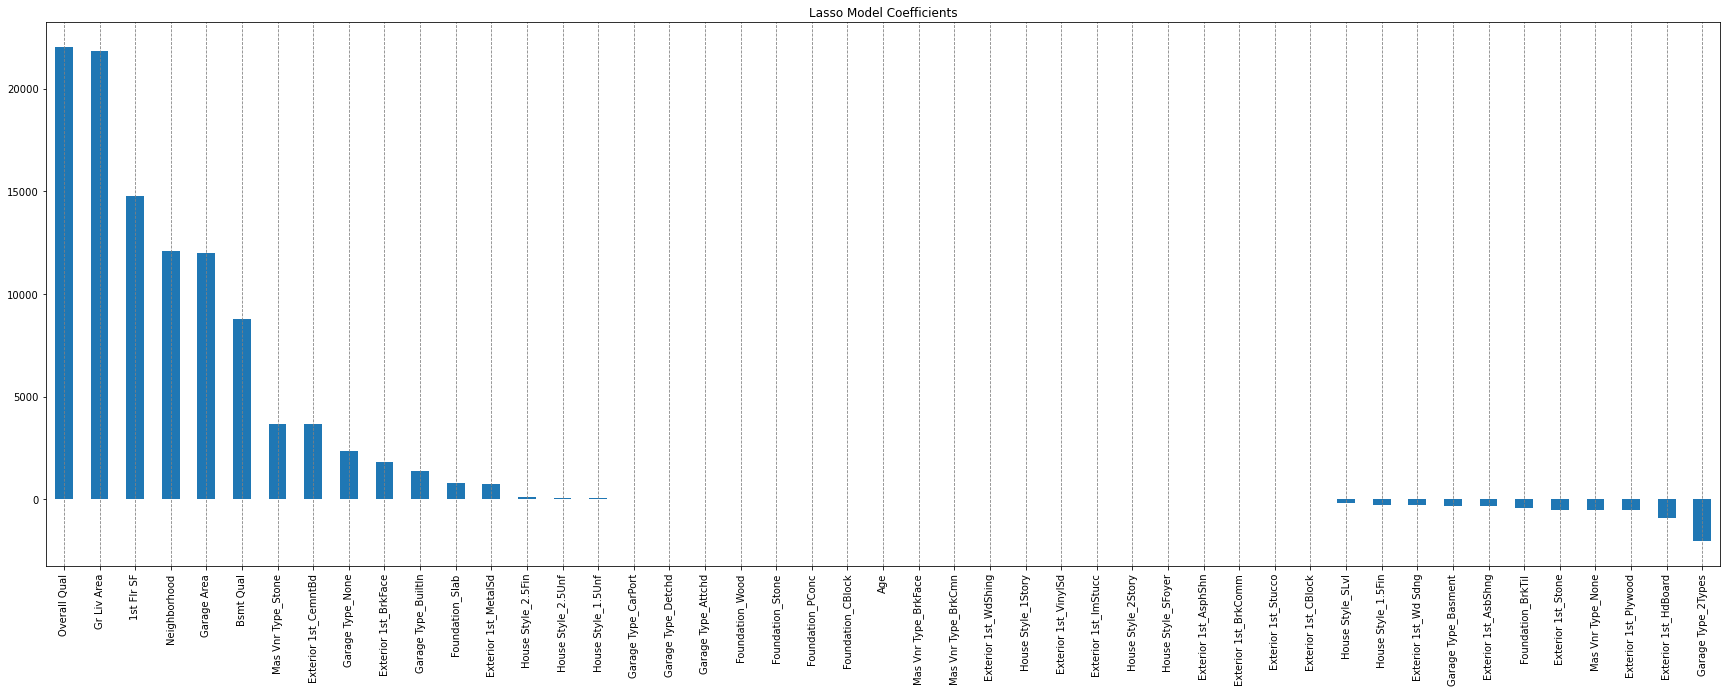

In [30]:
# Displaying coefficients for lasso model

pd.Series(lasso.coef_, index=features).sort_values(ascending=False).plot.bar(
    figsize=(30, 10),  title='Lasso Model Coefficients').xaxis.grid(
    color='gray', linestyle='dashed')

plt.savefig('figs/lasso_coef.png')
plt.show()

From the above graph, we can see that a lot of our features are brought to 0 by the Lasso. 

This means that they are not very relevant in our model.

Let's try to only keep the best performing features to see if we can get a lower RMSE.

In [31]:
abs(pd.Series(lasso.coef_, index=features)).sort_values(ascending=False)

Overall Qual            22024.979084
Gr Liv Area             21829.118877
1st Flr SF              14763.307621
Neighborhood            12100.581905
Garage Area             11991.363772
Bsmt Qual                8764.742269
Mas Vnr Type_Stone       3684.927983
Exterior 1st_CemntBd     3644.542290
Garage Type_None         2326.288997
Garage Type_2Types       2052.020151
Exterior 1st_BrkFace     1803.256766
Garage Type_BuiltIn      1368.356809
Exterior 1st_HdBoard      907.289432
Foundation_Slab           777.850850
Exterior 1st_MetalSd      754.612169
Exterior 1st_Plywood      525.253449
Mas Vnr Type_None         509.549841
Exterior 1st_Stone        501.885654
Foundation_BrkTil         414.954026
Exterior 1st_AsbShng      329.106703
Garage Type_Basment       310.639004
Exterior 1st_Wd Sdng      280.055934
House Style_1.5Fin        268.327601
House Style_SLvl          187.282004
House Style_2.5Fin        119.863376
House Style_2.5Unf         78.773637
House Style_1.5Unf         61.388988
E

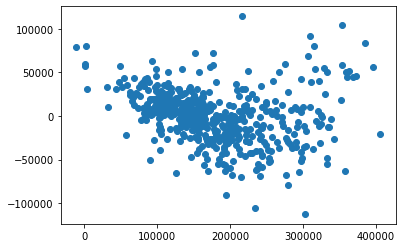

In [32]:
# Plot predictions (x-axis) against residuals (y-axis)
# Closer the scatter is to a horizontal line across zero, the better the model
residuals = y_test - pred
plt.scatter(pred, residuals)

##### Creating new models with our best variables

We are creating a new dataframe that will include our best 6 erforming variables and run new models on these.

In [33]:
# Creating a new dataframe with only the highest coefficients

house_coeff_clean = house_train_clean[['Overall Qual','Gr Liv Area',
                                       'Neighborhood', '1st Flr SF',
                                       'Garage Area', 'Bsmt Qual', 'SalePrice']]

In [34]:
# Creating a new set of variables for the new dataframe

features_coeff = [col for col in  house_coeff_clean if col != 'SalePrice']

X_coeff = house_coeff_clean[features_coeff]
y_coeff = house_coeff_clean['SalePrice']

In [35]:
# Train new model

X_coeff_train, X_coeff_test, y_coeff_train, y_coeff_test = train_test_split(X_coeff, y_coeff, random_state=100)

In [36]:
# Scale features

ss = StandardScaler()
ss.fit(X_coeff_train)
X_coeff_train_sc = ss.transform(X_coeff_train)
X_coeff_test_sc = ss.transform(X_coeff_test)

In [37]:
# Instantiate new models

lr_coeff = LinearRegression()
lasso_coeff = LassoCV(n_alphas=200)
ridge_coeff = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [38]:
# Generate cross valdiation for all three models

lr_coeff_scores = cross_val_score(lr_coeff, X_coeff_train_sc, y_coeff_train, cv=5)
lasso_coeff_scores = cross_val_score(lasso_coeff, X_coeff_train_sc, y_coeff_train, cv=5)
ridge_coeff_scores = cross_val_score(ridge_coeff, X_coeff_train_sc, y_coeff_train, cv=5)

In [39]:
print(lr_coeff_scores.mean())
print(lasso_coeff_scores.mean())
print(ridge_coeff_scores.mean())

0.8239145509300506
0.823936467745002
0.8240184600964205


With our new models, the Cross Validation is slightly lower than with our first model. 

However, let's see how they will do on the test data.

##### Model Fitting

In [40]:
# Model Fitting and Evaluation

lasso_coeff.fit(X_coeff_train_sc, y_coeff_train)
lasso_coeff.score(X_coeff_train_sc, y_coeff_train)

0.83153346344667

In [41]:
lasso_coeff.alpha_

64.94692743960819

Since we removed most the the features that were heavily penalised from our model, the Lasso alpha is much smaller than on our first model, meaning that the features are more balanced in our model.

##### Model Evaluation

Ridge is giving us the best results based on the Cross Validation score. As such we will fit it and check the score.

In [42]:
# Trying Ridge as it is our best model

ridge_coeff.fit(X_coeff_train_sc, y_coeff_train)
ridge_coeff.score(X_coeff_train_sc, y_coeff_train)

0.8315297529685293

In [43]:
# Extend of regularization for Ridge

ridge_coeff.alpha_

10.0

In [44]:
# Getting score for the validation portion of the dataset

ridge_coeff.score(X_coeff_test_sc, y_coeff_test)

0.837554791152785

In [45]:
# Fitting Linear Regression for comparison

lr_coeff.fit(X_coeff_train_sc, y_coeff_train)
lr_coeff.score(X_coeff_train_sc, y_coeff_train)

0.8315345939554832

On our test portion of the dataset we managed to get a result of 83,22%. 
This result is better than our first model by 0.5%.

This shows an small improvement compared to our first model.

Now let's get predictions for our new models

##### Getting Prediction results for each models

###### Lasso

In [46]:
pred_lcoeff = lasso_coeff.predict(X_coeff_test_sc)

In [47]:
r2_score(y_coeff_test, pred_lcoeff)

0.8374721903256553

###### Ridge

In [48]:
pred_rcoeff = ridge_coeff.predict(X_coeff_test_sc)

In [49]:
r2_score(y_coeff_test, pred_rcoeff)

0.837554791152785

###### Linear Regression

In [50]:
pred_lrcoeff = lr_coeff.predict(X_coeff_test_sc)

In [51]:
r2_score(y_coeff_test, pred_lrcoeff)

0.8373005627137515

Overall, we can see an improvement in R2 scores for each of our models compared to the predictions made using the first itteration of the models.

#### Getting RMSE Scores for each models

###### Lasso

In [52]:
# Getting RMSE score for selected Lasso Model

np.sqrt(metrics.mean_squared_error(y_coeff_test, pred_lcoeff))

29862.164018455253

###### Ridge

In [53]:
# Getting RMSE score for selected Ridge Model

np.sqrt(metrics.mean_squared_error(y_coeff_test, pred_rcoeff))

29854.57469286578

###### Linear Regression

In [54]:
# Getting RMSE score for selected Linear Regression Model

np.sqrt(metrics.mean_squared_error(y_coeff_test, pred_lrcoeff))

29877.926919553265

No surprise here, Ridge is stil lgiving us the best RMSE score. 

With our new models we managed to get our RMSE from 30334 to 29877$. 
This result in a gain of 1.5% accuracy compared to our first model.

In [55]:
# Getting Mean Absolute Error

np.abs(y_coeff_test - pred_rcoeff).mean()

22417.747334927142

##### Getting our coefficients

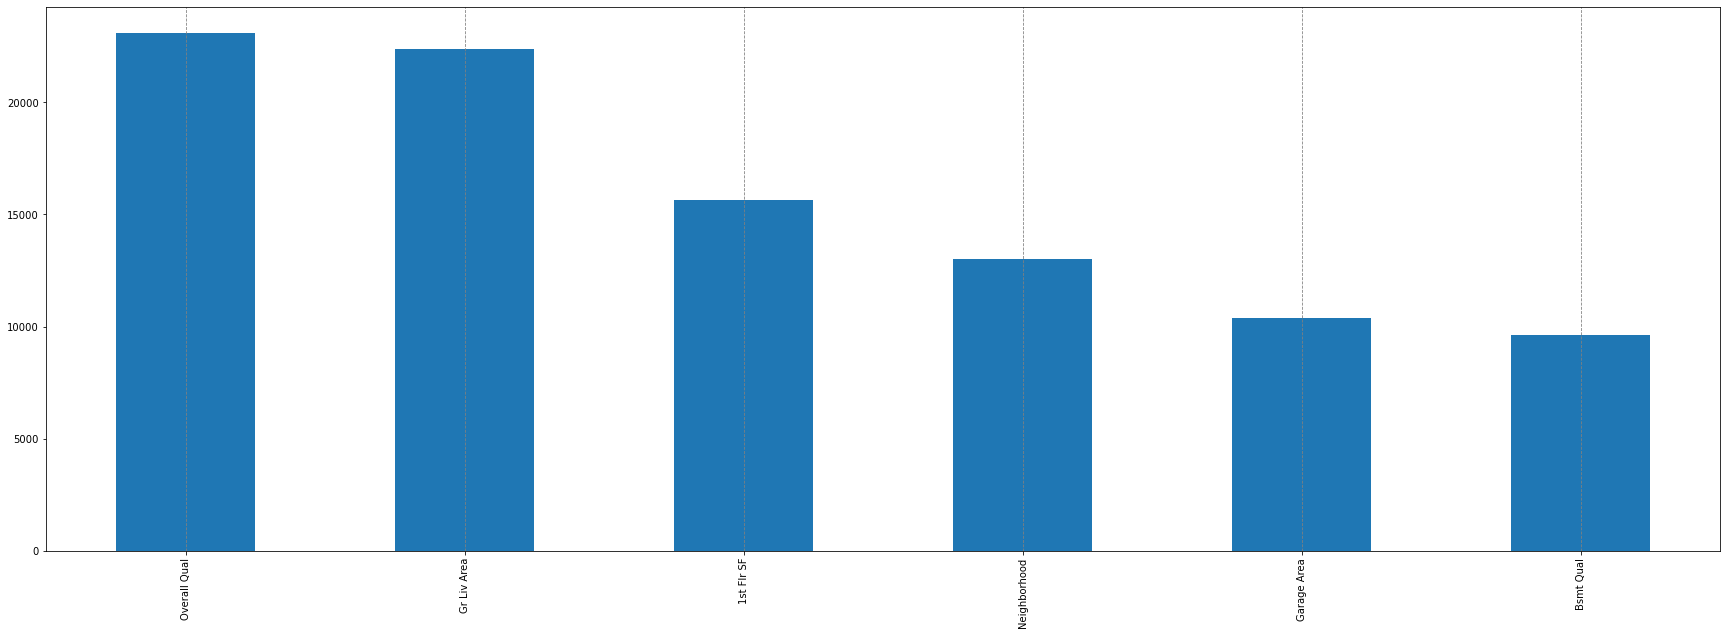

In [56]:
# Displaying coefficients for Ridge model

pd.Series(ridge_coeff.coef_, index=features_coeff).sort_values(ascending=False).plot.bar(figsize=(30, 10)).xaxis.grid(color='gray', linestyle='dashed')

plt.savefig('figs/lasso_coef_2.png')
plt.show()

In [57]:
pd.Series(ridge_coeff.coef_, index=features_coeff).sort_values(ascending=False)

Overall Qual    23107.450791
Gr Liv Area     22406.597428
1st Flr SF      15666.043422
Neighborhood    12997.712429
Garage Area     10399.363879
Bsmt Qual        9628.718262
dtype: float64

Using these coeffiecient we can predict the increase in value of a proprty based based on the increase in the variable.

For one unit of increase in the Overall Quality variable, a property would see an increase in value of 23107$

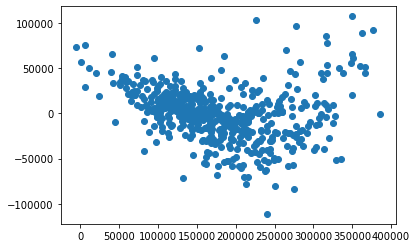

In [58]:
# Plot predictions (x-axis) against residuals (y-axis)
# Closer the scatter is to a horizontal line across zero, the better the model
residuals_coeff = y_coeff_test - pred_rcoeff
plt.scatter(pred_rcoeff, residuals_coeff)

Based on the results of our new model, we can now interpret our coefficients.

For each increase of 1 unit in our features, the sale price will increase by the associated value.

The most prominent features would be:
* Gr Liv Area
* Overall Quality
* 1st Flr SF

We can recommend to our client that if they want to maximize the sale price of their house they should focus on impriving one of these three areas.

### Applying our model to the Test Dataset to predict SalePrice

Now that we have trained and evaluated our model, it's time to run the prediction on the test.csv dataset and upload the results to Kaggle to see how rank among our classmates

##### Loading our cleaned test dataset

In [59]:
# loading our Cleaned Test CSV File

house_test_clean = pd.read_csv('datasets/test_cleaned.csv')

In [60]:
# Making sure that both Train and Test have the same number of columns and in the same order.

house_coeff_clean.columns

Index(['Overall Qual', 'Gr Liv Area', 'Neighborhood', '1st Flr SF',
       'Garage Area', 'Bsmt Qual', 'SalePrice'],
      dtype='object')

In [61]:
# Creating the new DataFrame based on the features selected for the final model

house_test_final = house_test_clean[['Overall Qual','Gr Liv Area',
                                       'Neighborhood', '1st Flr SF',
                                       'Garage Area', 'Bsmt Qual',]]

In [62]:
# Printing columns to compare with Train dataset

house_test_final.columns

Index(['Overall Qual', 'Gr Liv Area', 'Neighborhood', '1st Flr SF',
       'Garage Area', 'Bsmt Qual'],
      dtype='object')

##### Prediction

In [63]:
# Applying our standard scaler to the test dataset

ss_test = ss.transform(house_test_final)

In [64]:
# Running our Ridge, Lasso and LR Prediction on the scaled test data
# Same variables used to train our model

test_predict_ridge = ridge_coeff.predict(ss_test)
test_predict_lasso = lasso_coeff.predict(ss_test)
test_predict_lr = lr_coeff.predict(ss_test)

##### Loading original test csv to retrieve Id column

In [65]:
# Reading in the original Test dataset to get the ID back for Kaggle Submision

house_test = pd.read_csv('datasets/test.csv')

##### Creating a new dataframe

We are creating a new dataframe that will include the Id column from the original test.csv file and the predicted sale price for each house using our final model

In [66]:
# Creating a new Dataframe that will retrieve the Id from the original test.csv and assign the SalePrice based on our predictions.

kaggle_ridge = pd.DataFrame({'Id': house_test['Id'],'SalePrice': test_predict_ridge})
kaggle_lasso = pd.DataFrame({'Id': house_test['Id'], 'SalePrice': test_predict_lasso})
kaggle_lr = pd.DataFrame({'Id': house_test['Id'], 'SalePrice': test_predict_lr})

##### Saving our new dataframe to csv to upload to Kaggle

In [67]:
# Saving the new dataframe as csv to import to Kaggle
# Index False as we only want 2 columns( Id and SalePrice)

kaggle_ridge.to_csv('datasets/kaggle_ridge_submission.csv', index=False)
kaggle_lasso.to_csv('datasets/kaggle_lasso_submission.csv', index=False)
kaggle_lr.to_csv('datasets/kaggle_lr_submission.csv', index=False)

### Conclusion and Recommendations

In conclusion,

Our baseline had a margin of error of 80897$ when predicting sale price of houses.

Using our first model, we managed to bring down the margin of error to 30334. 
However, for this first model we used a total 47 variables. This makes our model quite complex and it could be hard to justify implementing it to stakeholders.
Also, since a lot of the variables were heavily penalised by our model, it wasn't running optimaly.

With this in mind, we reduced the number of variables making it simpler and easier to explain.
We also managed to improve the results of our model both in term of accuracy and margin of error.

Our final R2 value is 83.75% and the margin of error is 29854$


Using this new model, our company will be able to regain it's edge on the market and be able to deploy the best property value predictor on the market.

Since our model is simple (6 variables), we can also recommend our clients which features to improve in order to maximise the sale price of their properties. 

##### Recommendations



We could think of expanding our model not only to Ames properties but also to nearby town in other to increase the reach of our services.
We would only need to get the sales history of neghboring towns and train our model on this new data.


We can also leverage on our sale price improvement feature to gain another edge on the market, not only accuratly predicting sale price but also helping our clients in maximising the value of their properties using our coefficients.

Finally, we can also targets properties in the neighborhoods with an higher average or median sale price and be more agressive on our marketing in these areas, as they would be the properties bringing us the highest commissions.

##### Limitations of our model

As every model, we will need to retrain our model every week to remain accurate and adapt to new trends in the market.

We also need to be mindful of the outliers in our model as the results can be heavily skewed by them

Also, we used a transformation of Nieghborhoods based on SalePrice wich can lead to some issues with real time predictions.
* Instead of using the median house price to rank neighborhood it would be better to be better to rank the neighborhood bu their level of amenities.
This is something we should be focusing to improve our model.
